**Issues: lack of accuracy when running inference on many images**

Probably due to implementation issue

SOLVED: divided images into batches, used Pytorch Dataset and Dataloader. Visualized results using magic and pyplot


#Test implementation of Faster R-cnn model.

My conclusion after implementing this model is that it is:

1. fast
2. is not too big (160 mb)
3. relatively easy to implement

It will be a candidate model for our final implementation of the project.

##necessary libraries and constants

In [9]:
#libraries required for data preprocessing and training
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import os

In [2]:
# libraries required for loading the pretrained faster r-cnn model
import torch
import torchvision.transforms as T
import torchvision
from torchvision.utils import draw_bounding_boxes
import seaborn as sns
from PIL import Image, ImageDraw

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

##test images with humans

In [13]:
imgs_path = "/content/drive/MyDrive/capstone_data/capstone2024/human_detection_dataset/"

##load and test the pretrained model
faster r-cnn resnet50

In [ ]:
#load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    weights='COCO_V1',
    pretrained=True,
    progress=True,
    num_classes=91,
    pretrained_backbone=True)

model.to(device)
model.eval()

model

In [19]:
image_dir = imgs_path
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

In [37]:
data_transforms = T.Compose([
    T.ToTensor(),
    torchvision.transforms.Resize((800, 800))
])

In [38]:
# Create data loader
batch_size = 32
num_batches = 16



dataset = torchvision.datasets.ImageFolder(image_dir, data_transforms)
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2)

input format sample:
```

[{'boxes': tensor([[218.5880, 221.1194, 302.2849, 249.6168],
          [221.9106, 220.1520, 309.2340, 249.5996],
          [221.1359, 221.3544, 303.5072, 251.2587],
          [220.0885, 219.5507, 305.2927, 250.5530]], grad_fn=<StackBackward>),
  'labels': tensor([42, 16, 34,  9]),
  'scores': tensor([0.5189, 0.3786, 0.2456, 0.1067], grad_fn=<IndexBackward>)}]


```



In [ ]:
# Run inference
with torch.no_grad():
    for batch_idx, (images, _) in enumerate(data_loader):
        if batch_idx >= num_batches:
            break

        images = list(image.to(device) for image in images)
        outputs = model(images)

##Visualize the output

In [48]:
images[0]

tensor([[[0.8941, 0.8625, 0.7275,  ..., 0.9647, 0.9597, 0.9529],
         [0.8791, 0.8648, 0.7415,  ..., 0.9669, 0.9628, 0.9580],
         [0.8593, 0.8685, 0.7611,  ..., 0.9690, 0.9663, 0.9640],
         ...,
         [0.9158, 0.9189, 0.9226,  ..., 0.9296, 0.9235, 0.9108],
         [0.9244, 0.9241, 0.9243,  ..., 0.9299, 0.9024, 0.8603],
         [0.9294, 0.9272, 0.9255,  ..., 0.9299, 0.8868, 0.8235]],

        [[0.8745, 0.8429, 0.7079,  ..., 0.9283, 0.9311, 0.9333],
         [0.8628, 0.8475, 0.7231,  ..., 0.9316, 0.9351, 0.9383],
         [0.8477, 0.8546, 0.7444,  ..., 0.9358, 0.9402, 0.9448],
         ...,
         [0.8650, 0.8702, 0.8776,  ..., 0.9763, 0.9667, 0.9540],
         [0.8757, 0.8776, 0.8811,  ..., 0.9781, 0.9468, 0.9034],
         [0.8824, 0.8824, 0.8835,  ..., 0.9792, 0.9322, 0.8667]],

        [[0.6902, 0.6586, 0.5236,  ..., 0.6600, 0.6572, 0.6549],
         [0.6768, 0.6625, 0.5388,  ..., 0.6182, 0.6161, 0.6148],
         [0.6593, 0.6684, 0.5598,  ..., 0.5567, 0.5556, 0.

In [63]:
outputs[0]

{'boxes': tensor([[546.2429, 212.4321, 800.0000, 445.0815],
         [324.3477, 220.8125, 415.2647, 497.4000],
         [470.7364, 242.7188, 536.9785, 318.2350],
         [596.8693, 217.7338, 646.3110, 271.4059],
         [280.4673, 295.9476, 307.9131, 331.3462],
         [296.7833, 112.5176, 716.7571, 295.3525],
         [278.0239, 299.2806, 297.0677, 330.6904],
         [263.5834, 238.8395, 579.0993, 473.6056],
         [121.4982, 148.1787, 753.7817, 469.9191],
         [ 24.3146, 187.8520, 793.2882, 680.0046],
         [  0.0000, 347.6365, 796.2059, 770.2197],
         [109.5054, 119.6149, 750.7905, 464.8888],
         [288.6687, 109.6122, 720.4746, 293.5021],
         [702.1072, 197.8433, 746.5195, 214.7773],
         [ 22.4362, 324.7312, 784.3817, 781.7878],
         [  1.6590, 325.0966, 780.9092, 767.8918],
         [ 13.8699, 294.4211, 777.0864, 786.6555]], device='cuda:0'),
 'labels': tensor([ 3,  1, 55, 62,  1,  8,  1,  3,  3,  3, 15,  8,  6, 62, 35, 67, 28],
        device='c

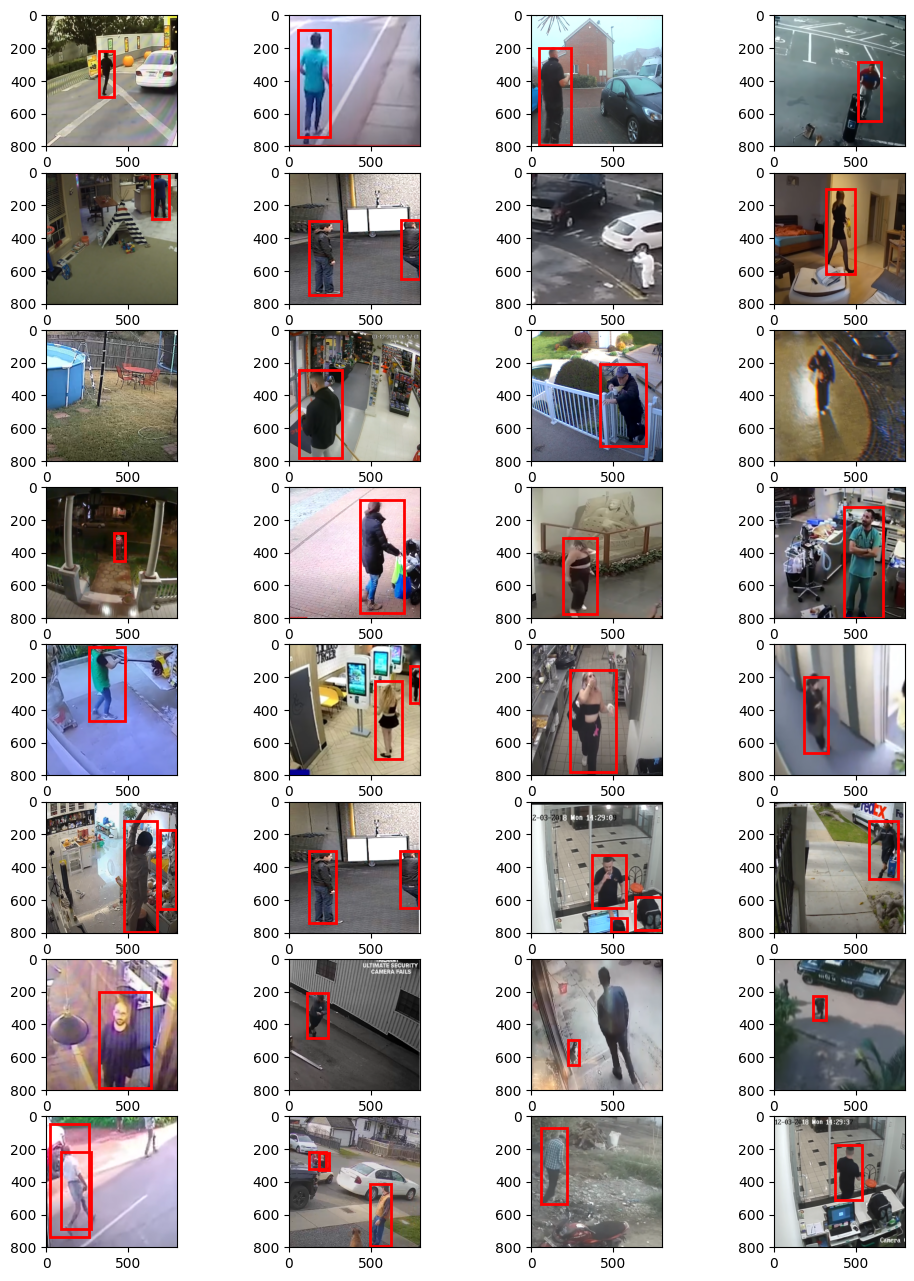

In [79]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(8, 4, figsize=(12,16))


# handmade code. do not touch
indx, indy = 0,0
for image, output in zip(images, outputs):
    if indx==8:
      indy+=1
      indx=0

    image = image.permute(1, 2, 0).cpu().numpy()
    boxes = output['boxes'].cpu().detach().numpy()
    labels = output['labels'].cpu().detach().numpy()
    scores = output['scores'].cpu().detach().numpy()

    ax[indx, indy].imshow(image)

    for i in range(len(boxes)):
      if scores[i] > 0.8 and labels[i] == 1.0:

        # [324.3477 (x1), 220.8125 (y2), 415.2647 (x2), 497.4000 (y1)]
        x1, x2, y1, y2 = boxes[i][0], boxes[i][2], boxes[i][3],boxes[i][1]
        rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
        ax[indx, indy].add_patch(rect)

    ax[indx, indy].set_xlim(0, image.shape[1])  # Set the x-axis limits based on the image width
    ax[indx, indy].set_ylim(image.shape[0], 0)  # Set the y-axis limits based on the image height (inverted for correct orientation)
    indx+=1

plt.show()